<a href="https://colab.research.google.com/github/Yukthakarkera/Data-Science/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/Social_Network_Ads.csv') #reading csv file
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
x=df.iloc[:,[2,3]].values #selecting feature
y=df.iloc[:,4].values #selecting label

In [3]:
#splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [4]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [5]:
#creating Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
#Training the model using fit function
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

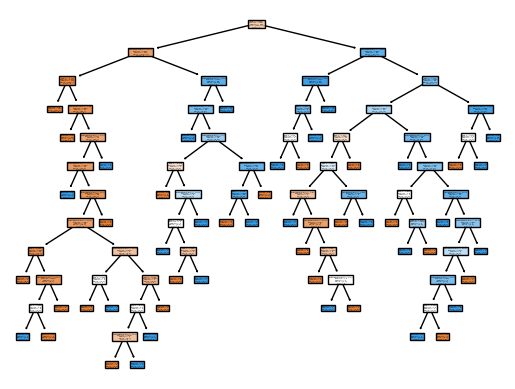

In [8]:
import matplotlib.pyplot as plt
plot_tree(model,feature_names=['age','estimated salary'],class_names=['0','1'],filled=True)
plt.show()

In [9]:
#Predicting values of test set
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)

confusion matrix
 [[62  6]
 [ 3 29]]


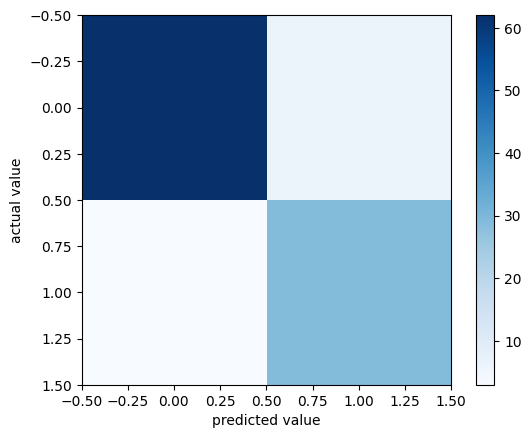

In [11]:
#plotting graph for confusion matrix
import matplotlib.pyplot as plt
plt.imshow(cm,cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [12]:
#finding classification report of actual and predicted values
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



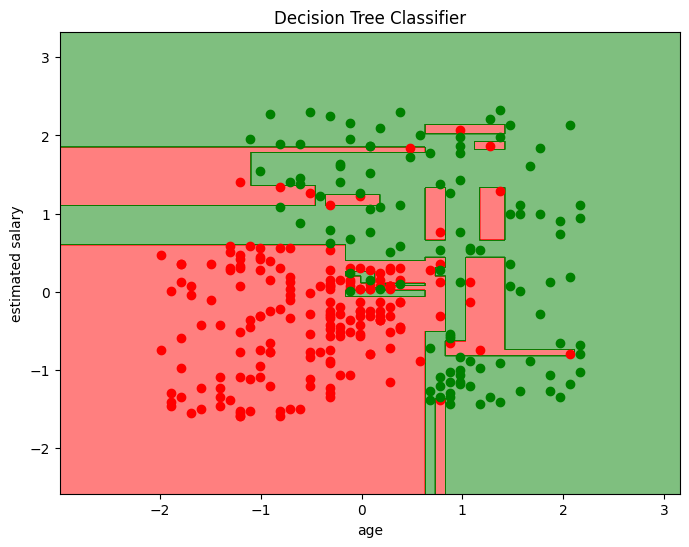

In [15]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
import numpy as np
x1,x2=np.meshgrid(np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01),
                  np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01))
z=model.predict(np.array([x1.ravel(),x2.ravel()]).T)
z=z.reshape(x1.shape)
plt.figure(figsize=(8,6))
cmap=ListedColormap(('red','green'))
plt.contourf(x1,x2,z,alpha=0.5,cmap=cmap)
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='red',label='0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='green',label='1')
plt.title('Decision Tree Classifier')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.show()